In [4]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive')

# Exploracion de la data

In [6]:
data_train= "/content/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "/content/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [11]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


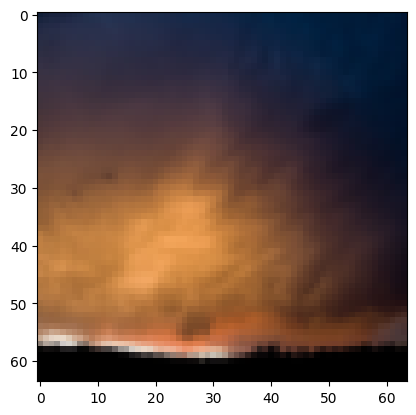

In [12]:
plt.imshow(xtrain[0])

In [13]:
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [14]:
np.shape(xtrain_)

(209, 12288)

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]}
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ])
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$



# Topologia de la red

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]


In [15]:
n_x = 12288# -- size of the input layer
#n_h = # -- size of the hidden layer
n_y = 1# -- size of the output layer

class layer_nn():
  def __init__(self,act_fun, n_layer_present, n_layer_before ):
    self.W = 2*np.random.random((n_layer_before,n_layer_present)) - 1
    self.B = 2*np.random.random((n_layer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z,A, Ap):
    self.Z = Z
    self.A = A
    self.Ap = Ap

  def derivates(self, dW, db):
    self.dW = dW
    self.db = db


@np.vectorize
def relu(x):
  if(x>=0):
    return x
  else :
    return 0

@np.vectorize
def reluP(x):
  if(x>=0):
    return 1
  else :
    return 0

def sigmoide(x):
  f= lambda x: 1/(1+np.exp(-x))
  return f(x)

def act_function(x, activation):
    if activation == "sigmoid":
        f = sigmoide(x)
        fp = sigmoide(x)*(1-sigmoide(x))
    elif activation == "tanh":
        f = lambda x: np.tanh(x)

    elif activation == "relu":
        f = relu(x)
        fp = reluP(x)

    return f, fp


In [16]:
layer = layer_nn("hola, ",1,1)
layer.W

array([[-0.39760484]])

In [17]:

#l1 =  layer_nn("sigmoid", 3, n_x )
#l2 =  layer_nn("sigmoid", 4, 3 )
#l3 =  layer_nn("sigmoid", 6, 4 )
#l4 =  layer_nn("sigmoid", 1, 6 )
#nn_red = [l1,l2,l3,l4]

def red_neuronal(topology, act_fn):
  nn_red = []
  L = len(topology)
  for i in range(1, L):
    nn_red.append(layer_nn(act_fn[i],topology[i],topology[i-1] ) )
  return nn_red


In [18]:
topology = [n_x, 3, 4, 6 ,1]
act_fn   = [None,"relu", "relu", "relu", "sigmoid" ]

nn_red = red_neuronal(topology, act_fn)

In [19]:
l1,l2,l3,l4 = nn_red.copy()

In [20]:
# Forward pass y check dimensiones

In [21]:
A0 = xtrain_.T
Y = np.array(train_label)

In [22]:
# Para la capa 1
Z1 = l1.W.T @ A0 + l1.B
A1, A1p = act_function(Z1, l1.act_fun)

# Para la capa 2
Z2 = l2.W.T @ A1 +l2.B
A2, A2p = act_function(Z2, l2.act_fun)

# Para la capa 3
Z3 = l3.W.T @ A2 + l3.B
A3, A3p = act_function(Z3, l3.act_fun)

# Para la capa 4
Z4 = l4.W.T @ A3 + l4.B
A4, A4p = act_function(Z4, l4.act_fun)

In [23]:
for layer in nn_red:
  print(layer.act_fun)

relu
relu
relu
sigmoid


In [24]:
def forward_pass(input, nn_red):
  A0 = input
  nn_red_update = []

  for layer in nn_red:
    Z = layer.W.T@A0 + layer.B
    A, Ap = act_function(Z, layer.act_fun)
    layer.output(Z, A, Ap)
    nn_red_update.append(layer)
    A0 = A.copy()
  return A, nn_red_update


In [25]:
A0 = xtrain_.T
A, nn = forward_pass(A0, nn_red)

In [26]:
nn

# Determinación de la Función de coste

$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [27]:
def cost_Function(A, Y):
  m = Y.shape[0]
  m_ = 1/m
  cost = Y*np.log(A)+(1-Y)*np.log(1-A)
  cost = -m_*cost.sum()
  return cost

In [28]:
J = cost_Function(A, Y)
print(J)

2.4004033135098646


In [29]:
J = cost_Function(A4, Y)
print(J)

2.4004033135098646


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} A^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) A^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}


Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} dZ^{(i)[l]}
\end{equation}





 $dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $


$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} . dZ^{[l]} \tag{3}$


In [30]:
#def backward_propagation(AL,Y, nn):
# Capa L-esima
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
fp = nn[3].Ap
dZ = dAL*fp
m_ = 1/209

dW_L = m_*dZ@nn[2].Ap.T
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)

nn[3].dW=dW_L
nn[3].db=db_L


In [31]:
np.shape(nn[3].W.T)
np.shape(dZ)

(1, 209)

In [32]:
# Capa L-1
dAL_1 = np.dot(nn[3].W, dZ)
#dAL_1 = dAL
fp = nn[2].Ap
dZ_1 = dAL_1*fp
dW_L1 = m_*dZ_1@nn[1].Ap.T
db_L1 = dZ_1.mean()

nn[2].dW=dW_L1
nn[2].db=db_L1

In [33]:
# Capa L-2
dAL_2 =  np.dot(nn[2].W, dZ_1)

fp = nn[1].Ap
dZ_2 = dAL_2*fp
dW_L2 = m_*dZ_2@nn[0].Ap.T
db_L2 = dZ_2.mean()

nn[1].dW=dW_L2
nn[1].db=db_L2

In [34]:
a=nn[1].dW.copy()

In [35]:
def backward_propagation(AL,Y,nn):
  L = len(nn) - 1

  dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
  fp = nn[L].Ap
  dZ = dAL*fp
  m_ = 1/np.shape(Y)[0]

  dW_L = m_*dZ@nn[L-1].Ap.T
  db_L = m_*np.sum(dZ, axis=1, keepdims=True)
  nn[L].dW=dW_L
  nn[L].db=db_L
  dAL_1 = np.dot(nn[L].W, dZ)

  for l in reversed(range(1,L)):
    fp = nn[l].Ap
    dZ_1 = dAL_1*fp
    dW_L1 = m_*dZ_1@nn[l-1].Ap.T
    db_L1 = m_*np.sum(dZ_1, axis=1, keepdims=True)

   # dAL = dAL_1.copy()
    nn[l].dW=dW_L1
    nn[l].db=db_L1
    dAL_1 = np.dot(nn[l].W, dZ_1)

  return nn

def update_params(nn, learning_rate):
  L = len(nn)
  for l in range(1, L):
    nn[l].W = nn[l].W - learning_rate*nn[l].dW.T
    nn[l].B = nn[l].B - learning_rate*nn[l].db
  return nn


In [36]:
nn=backward_propagation(A,Y,nn)


In [37]:
a==nn[1].dW

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [38]:
nn=update_params(nn, 0.02)

In [39]:
nn[3].dW

array([[0.34622846, 0.50528394, 0.00422708, 0.00940753, 0.50621206,
        0.00587656]])

In [40]:
A, nn = forward_pass(A0, nn)

# Aplicacion gradiente descendente

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$


In [41]:
def update_params(nn, learning_rate):
  L=len(nn)
  for l in range(1, L):

    nn[l].W = nn[l].W - learning_rate*nn[l].dW.T
    nn[l].B = nn[l].B - learning_rate*nn[l].db
  return nn

In [42]:
learning_rate=0.1
nn = backward_propagation(A, Y,nn)
nn = update_params(nn, learning_rate)
A, nn = forward_pass(A0, nn)
J = cost_Function(A, np.array(train_label))


# Algoritmo General

==============================================

In [43]:
n_x = 12288# -- size of the input layer
#n_h = # -- size of the hidden layer
n_y = 1# -- size of the output layer


class layer_nn():
  def __init__(self,act_fun, n_layer_present, n_layer_before ):
    self.W = 2*np.random.random((n_layer_before,n_layer_present)) - 1
    self.B = 2*np.random.random((n_layer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z,A, Ap):
    self.Z = Z
    self.A = A
    self.Ap = Ap

  def derivates(self, dW, db):
    self.dW = dW
    self.db = db

@np.vectorize
def relu(x):
  if(x>=0):
    return x
  else :
    return 0

@np.vectorize
def reluP(x):
  if(x>=0):
    return 1
  else :
    return 0

def sigmoide(x):
  f= lambda x: 1/(1+np.exp(-x))
  return f(x)

def act_function(x, activation):
    if activation == "sigmoid":
        f = sigmoide(x)
        fp = sigmoide(x)*(1-sigmoide(x))
    elif activation == "tanh":
        f = lambda x: np.tanh(x)

    elif activation == "relu":
        f = relu(x)
        fp = reluP(x)

    return f, fp


def forward_pass(input, nn_red):
  A0 = input
  nn_red_update = []

  for layer in nn_red:
    Z = layer.W.T@A0 + layer.B
    A, Ap = act_function(Z, layer.act_fun)
    layer.output(Z, A, Ap)
    nn_red_update.append(layer)
    A0 = A
  return A, nn_red_update


def cost_Function(A, Y):
  m = Y.shape[0]
  m_ = 1/m
  cost = Y*np.log(A)+(1-Y)*np.log(1-A)
  cost = -m_*cost.sum()
  return cost


def backward_propagation(AL,Y,nn):
  L = len(nn) - 1

  dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
  fp = nn[L].Ap
  dZ = dAL*fp
  m_ = 1/np.shape(Y)[0]

  dW_L = m_*dZ@nn[L-1].Ap.T
  db_L = m_*np.sum(dZ, axis=1, keepdims=True)

  nn[L].dW=dW_L
  nn[L].db=db_L

  for l in reversed(range(1,L)):
    dAL_1 = dAL
    fp = nn[l].Ap
    dZ_1 = dAL_1*fp
    dW_L1 = m_*dZ_1@nn[l-1].Ap.T
    db_L1 = m_*np.sum(dZ_1, axis=1, keepdims=True)

    dAL=dAL_1

    nn[l].dW=dW_L1
    nn[l].db=db_L1

  return nn

def update_params(nn, learning_rate):
  L=len(nn)
  for l in range(1, L):
    nn[l].W = nn[l].W - learning_rate*nn[l].dW.T
    nn[l].B = nn[l].B - learning_rate*nn[l].db
  return nn

def red_neuronal(topology, act_fn):
  nn_red = []
  L = len(topology)
  for i in range(1, L):
    nn_red.append(layer_nn(act_fn[i],topology[i],topology[i-1] ) )
  return nn_red


In [44]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

In [45]:
# Read the data
data_train= "/content/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "/content/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]

xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255


topology = [n_x, 3, 4, 6 ,1]
act_fn   = [None,"relu", "relu", "relu", "sigmoid" ]
nn_red = red_neuronal(topology, act_fn)


In [46]:
J=1.
type(J)

float

In [51]:
import numba

/tmp/ipython-input-43-3090359542.py:36: RuntimeWarning: overflow encountered in exp
  f= lambda x: 1/(1+np.exp(-x))
/tmp/ipython-input-43-3090359542.py:69: RuntimeWarning: divide by zero encountered in log
  cost = Y*np.log(A)+(1-Y)*np.log(1-A)
/tmp/ipython-input-43-3090359542.py:69: RuntimeWarning: invalid value encountered in multiply
  cost = Y*np.log(A)+(1-Y)*np.log(1-A)
/tmp/ipython-input-43-3090359542.py:77: RuntimeWarning: divide by zero encountered in divide
  dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
/tmp/ipython-input-43-3090359542.py:77: RuntimeWarning: invalid value encountered in divide
  dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
/tmp/ipython-input-43-3090359542.py:79: RuntimeWarning: invalid value encountered in multiply
  dZ = dAL*fp
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2480: RuntimeWarning: invalid value encountered in relu (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.11/dist-packages/numpy/lib/

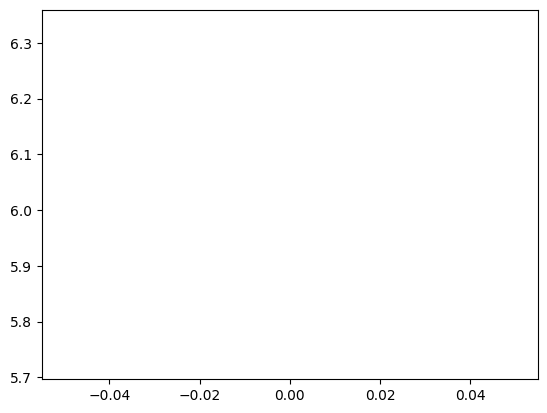

In [49]:
A0 = xtrain_.T
Y = np.array(train_label)

A, nn = forward_pass(A0, nn_red)
J = cost_Function(A, np.array(train_label))
j = []
j.append(J)

for i in range(1,100):

  nn = backward_propagation(A, Y, nn)
  nn = update_params(nn, 0.002)
  A, nn = forward_pass(A0, nn)

  J = cost_Function(A, np.array(train_label))
  j.append(J)

plt.plot(j)


In [50]:
A0 = xtest_.T
Y = np.array(train_label)
A, nn = forward_pass(A0, nn)
A

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2480: RuntimeWarning: invalid value encountered in relu (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2480: RuntimeWarning: invalid value encountered in reluP (vectorized)
  outputs = ufunc(*inputs)


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])